In [1]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        print('CLASS')
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        print('REG')
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Function to plot results
def plot(results):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for activation in results['Activation'].unique():
        subset = results[results['Activation'] == activation]
        ax.plot(subset['Neurons'].astype(str), subset['RMSE'], marker='o', label=activation)

    ax.set_title('Model Performance by Activation Function')
    ax.set_xlabel('Layer Configuration (Neurons)')
    ax.set_ylabel('RMSE')
    ax.legend(title='Activation Function')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


ModuleNotFoundError: No module named 'sklearn'

REG


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 4s - 27ms/step - loss: 2.5643 - val_loss: 0.4209
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.3711 - val_loss: 0.3393
Epoch 3/1000
136/136 - 1s - 4ms/step - loss: 0.2653 - val_loss: 0.3591
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.2162 - val_loss: 0.3723
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.1824 - val_loss: 0.3818
Epoch 6/1000
136/136 - 1s - 6ms/step - loss: 0.1581 - val_loss: 0.4008
Epoch 7/1000
136/136 - 1s - 6ms/step - loss: 0.1387 - val_loss: 0.4059
Epoch 8/1000
136/136 - 1s - 7ms/step - loss: 0.1228 - val_loss: 0.4100
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.1124 - val_loss: 0.4189
Epoch 10/1000
136/136 - 1s - 6ms/step - loss: 0.1053 - val_loss: 0.4315
Epoch 11/1000
136/136 - 1s - 9ms/step - loss: 0.0975 - val_loss: 0.4323
Epoch 12/1000
136/136 - 1s - 10ms/step - loss: 0.0865 - val_loss: 0.4422
Epoch 12: early stopping
Epoch 1/1000
136/136 - 4s - 28ms/step - loss: 2.1934 - val_loss: 0.4525
Epoch 2/1000
136/136 - 1s - 6ms/step - loss: 0

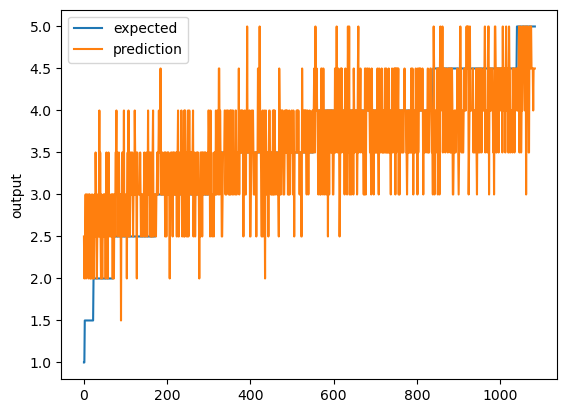

In [2]:
# Author: Nicolas Gugliemo, Katrina Yu
# Date: 9/16/2024
# Project: Project 1 Yelp Business Rating Prediction using Tensorflow
# Goal: Predict Business's stars rating... 
# (1) Report the RMSE and plot the lift chart of the BEST neural network model you have obtained.
# (2) Choose 5 arbitrary businesses from your test data (preferably from different categories). Show
#     the names, the true star ratings, and the predicted ratings (from your best model) of those
#     businesses.
# Type: Regression (Expect a number)
# Data Restrictions:
# (1) Businesses with at least 20 reviews
# (2) At least 10K businesses in set
# (3) Business = busisness_id, stars, review_count, categories
# (4) Review   = busisness_id, stars, text 
'''Grading:  (5 pts) Do train/test split.
 (5 pts) Remove all the businesses with less than 20 reviews.
 (10 pts) Use TF-IDF to do feature extraction from review texts.
 (10 pts) Use EarlyStopping when using Tensorflow.
 (30 pts) Change the following hyperparameters to record how they affect performance in your report.
Tabulate your findings.
o Activation: relu, sigmoid, tanh
o Layers and neuron counts
o Optimizer: adam and sgd
 (10 pts) Report the RMSE of the BEST regression model you obtained
 (10 pts) Plot the lift chart on test data of the BEST regression model you obtained
 (5 pts) Show names and the true ratings of 5 businesses, and their predicted ratings
 (5 pts) Your report includes the following sections:
o Problem Statement
o Methodology
o Experimental Results and Analysis
o Task Division and Project Reflection
 (10 pts) Additional features
'''
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 20]

# You may use the following code to group ALL the reviews by each business and create a new
# dataframe, where each line is a business with all its reviews aggregated together. From there,
# you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

# Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Run the model 5 times to ensure best model is found
i = 0
while (i < 5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)

# Rounding up preditcted values to .5
for i in pred:
    if i[0] < 5:
        i[0] = round(i[0]*2)/2
    if i[0] > 5:
        i[0] = 5

print(pred)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(), y_test)


13. Ardmore Pizza kV_Q1oqis8Qli8dUoGpTyQ: rating: 3.5, predicted rating: [2.5]
225. Champion Chevrolet - Service Department NQhyMw8SOU1HB-V9X52CTg: rating: 3.0, predicted rating: [3.]
625. Doylestown Rock Climbing Gym & Adventure Center CjLHLVoHJKgsa4cRcvF-WQ: rating: 4.0, predicted rating: [4.]
301. Candida's Pizza ZfWVso8VlT0VN14rxVHccQ: rating: 2.5, predicted rating: [3.]
86. MDG Salon Studio r_8FZXRkGoc5QNbTOAIftA: rating: 4.5, predicted rating: [3.5]


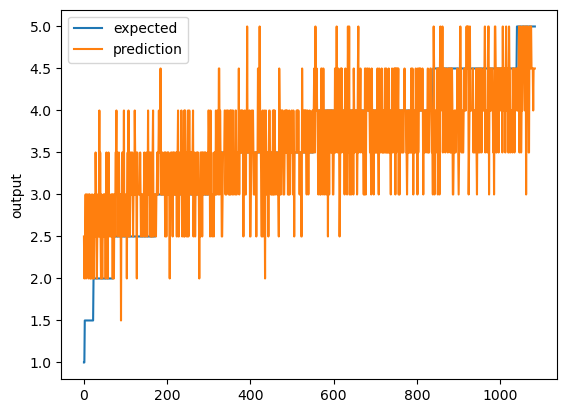

In [3]:
# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for i in range(5):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)


In [4]:
# Per Category 
ctgry = 'Mexican'


# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df_0 = pd.read_json(business_Path, lines=True, nrows = 100000)
b_id = all_business_df[['business_id']]


# Filter to specific category
all_business_df = all_business_df_0[all_business_df_0['categories'].astype(str).str.contains(ctgry)]
print(all_business_df)

# Filter our businesses with less than 20 reviews
business_df = all_business_df[all_business_df['review_count'] >= 50]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i < 5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
'''
# Rounding up preditcted values to .5
for i in pred:
    if i[0] < 5:
        i[0] = round(i[0]*2)/2 '''

print(pred)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for j in range(10):
    #j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(), y_test)


                  business_id                    name               address  \
104    Dy91wdWkwtI_qgjAIZ0Niw     Taqueria Los Primos  3322 Old Capitol Trl   
153    aNtKyc2rr-uK5cqzY9TVQQ  Chipotle Mexican Grill     10160 Ulmerton Rd   
159    X_E7U2lVNEwbH_gpOBmAHQ          Cerveza Jack's         135 2nd Ave N   
278    W57cR9a7XP6RX56MSWHJJA          Las Margaritas      514 S Rampart St   
290    xa6JYHDgVza7CuenKBJBHw       Taqueria El Sitio   3466 A Lebanon Pike   
...                       ...                     ...                   ...   
99919  4E6kHJ7yxDpu43L8he6F7A      La Casita Taqueria           8400 Oak St   
99926  lWnqWDfcISTHnL973Uwplg    Mariscos Las Islitas      1700 S Wells Ave   
99953  vHys_KQJys2bSO2w1_WHrg         Los Tacos Locos         119 S York Rd   
99989  lkAzVdzEZE0jEU91PmvQhQ        Margaritas Grill  3320 Old Capitol Trl   
99993  Z2_-rlxyXQsqcGXChydhlA  La Guera Mexican Grill        132 Garrett Rd   

              city state postal_code   latitude   l

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 2s - 357ms/step - loss: 13.3778 - val_loss: 11.9758
Epoch 2/1000
5/5 - 0s - 19ms/step - loss: 11.4834 - val_loss: 9.6004
Epoch 3/1000
5/5 - 0s - 20ms/step - loss: 8.6640 - val_loss: 6.3495
Epoch 4/1000
5/5 - 0s - 20ms/step - loss: 5.2449 - val_loss: 2.8259
Epoch 5/1000
5/5 - 0s - 20ms/step - loss: 2.0928 - val_loss: 1.1356
Epoch 6/1000
5/5 - 0s - 13ms/step - loss: 1.6442 - val_loss: 1.8840
Epoch 7/1000
5/5 - 0s - 14ms/step - loss: 1.9865 - val_loss: 1.3050
Epoch 8/1000
5/5 - 0s - 21ms/step - loss: 1.2538 - val_loss: 1.0028
Epoch 9/1000
5/5 - 0s - 13ms/step - loss: 1.0098 - val_loss: 1.1125
Epoch 10/1000
5/5 - 0s - 14ms/step - loss: 1.0343 - val_loss: 1.0111
Epoch 11/1000
5/5 - 0s - 20ms/step - loss: 0.8068 - val_loss: 0.8638
Epoch 12/1000
5/5 - 0s - 21ms/step - loss: 0.7437 - val_loss: 0.8347
Epoch 13/1000
5/5 - 0s - 21ms/step - loss: 0.6650 - val_loss: 0.7939
Epoch 14/1000
5/5 - 0s - 21ms/step - loss: 0.5184 - val_loss: 0.7261
Epoch 15/1000
5/5 - 0s - 21ms/step - loss: 0.5232 - 

IndexError: index 101 is out of bounds for axis 0 with size 40

REG


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 6s - 48ms/step - loss: 3.0643 - val_loss: 0.4842
Epoch 2/1000
136/136 - 1s - 8ms/step - loss: 0.5492 - val_loss: 0.3767
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.4198 - val_loss: 0.3822
Epoch 4/1000
136/136 - 1s - 9ms/step - loss: 0.3577 - val_loss: 0.3975
Epoch 5/1000
136/136 - 1s - 8ms/step - loss: 0.3196 - val_loss: 0.3738
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.2974 - val_loss: 0.3884
Epoch 7/1000
136/136 - 1s - 8ms/step - loss: 0.2862 - val_loss: 0.4103
Epoch 8/1000
136/136 - 1s - 9ms/step - loss: 0.2473 - val_loss: 0.3894
Epoch 9/1000
136/136 - 1s - 9ms/step - loss: 0.2435 - val_loss: 0.4164
Epoch 10/1000
136/136 - 1s - 10ms/step - loss: 0.2435 - val_loss: 0.4103
Epoch 11/1000
136/136 - 1s - 9ms/step - loss: 0.2414 - val_loss: 0.4151
Epoch 12/1000
136/136 - 1s - 10ms/step - loss: 0.2212 - val_loss: 0.4091
Epoch 13/1000
136/136 - 1s - 10ms/step - loss: 0.2132 - val_loss: 0.4020
Epoch 14/1000
136/136 - 1s - 9ms/step - loss: 0.1902 - val_loss: 0.39

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 20ms/step - loss: 1.5515 - val_loss: 0.6297
Epoch 2/1000
136/136 - 1s - 5ms/step - loss: 0.8032 - val_loss: 0.5956
Epoch 3/1000
136/136 - 1s - 10ms/step - loss: 0.7293 - val_loss: 0.5546
Epoch 4/1000
136/136 - 1s - 10ms/step - loss: 0.6389 - val_loss: 0.4876
Epoch 5/1000
136/136 - 1s - 9ms/step - loss: 0.5506 - val_loss: 0.4254
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.4999 - val_loss: 0.3688
Epoch 7/1000
136/136 - 1s - 9ms/step - loss: 0.4423 - val_loss: 0.3422
Epoch 8/1000
136/136 - 1s - 8ms/step - loss: 0.4006 - val_loss: 0.3431
Epoch 9/1000
136/136 - 1s - 8ms/step - loss: 0.3898 - val_loss: 0.3383
Epoch 10/1000
136/136 - 1s - 7ms/step - loss: 0.3750 - val_loss: 0.3105
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.3557 - val_loss: 0.3037
Epoch 12/1000
136/136 - 1s - 8ms/step - loss: 0.3455 - val_loss: 0.3082
Epoch 13/1000
136/136 - 1s - 7ms/step - loss: 0.3226 - val_loss: 0.2994
Epoch 14/1000
136/136 - 1s - 7ms/step - loss: 0.3136 - val_loss: 0.300

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 9s - 64ms/step - loss: 2.2395 - val_loss: 0.4006
Epoch 2/1000
136/136 - 2s - 14ms/step - loss: 0.4531 - val_loss: 0.3784
Epoch 3/1000
136/136 - 2s - 13ms/step - loss: 0.3537 - val_loss: 0.3710
Epoch 4/1000
136/136 - 2s - 13ms/step - loss: 0.2933 - val_loss: 0.4047
Epoch 5/1000
136/136 - 2s - 13ms/step - loss: 0.2549 - val_loss: 0.4063
Epoch 6/1000
136/136 - 2s - 13ms/step - loss: 0.2568 - val_loss: 0.4001
Epoch 7/1000
136/136 - 2s - 13ms/step - loss: 0.2286 - val_loss: 0.4025
Epoch 8/1000
136/136 - 2s - 13ms/step - loss: 0.2095 - val_loss: 0.4049
Epoch 9/1000
136/136 - 2s - 13ms/step - loss: 0.1965 - val_loss: 0.4023
Epoch 10/1000
136/136 - 2s - 13ms/step - loss: 0.1824 - val_loss: 0.3985
Epoch 11/1000
136/136 - 2s - 13ms/step - loss: 0.1758 - val_loss: 0.4070
Epoch 12/1000
136/136 - 2s - 13ms/step - loss: 0.1783 - val_loss: 0.4122
Epoch 13/1000
136/136 - 2s - 12ms/step - loss: 0.1735 - val_loss: 0.4105
Epoch 13: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 20ms/step - loss: 1.4596 - val_loss: 0.6161
Epoch 2/1000
136/136 - 1s - 7ms/step - loss: 0.7706 - val_loss: 0.5726
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.7050 - val_loss: 0.5252
Epoch 4/1000
136/136 - 1s - 7ms/step - loss: 0.6036 - val_loss: 0.4758
Epoch 5/1000
136/136 - 1s - 7ms/step - loss: 0.5434 - val_loss: 0.3982
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.4622 - val_loss: 0.3586
Epoch 7/1000
136/136 - 1s - 8ms/step - loss: 0.4181 - val_loss: 0.3285
Epoch 8/1000
136/136 - 1s - 8ms/step - loss: 0.3956 - val_loss: 0.3168
Epoch 9/1000
136/136 - 1s - 8ms/step - loss: 0.3731 - val_loss: 0.3147
Epoch 10/1000
136/136 - 1s - 8ms/step - loss: 0.3613 - val_loss: 0.2979
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.3444 - val_loss: 0.2926
Epoch 12/1000
136/136 - 1s - 8ms/step - loss: 0.3364 - val_loss: 0.3091
Epoch 13/1000
136/136 - 1s - 8ms/step - loss: 0.3217 - val_loss: 0.3113
Epoch 14/1000
136/136 - 1s - 7ms/step - loss: 0.3153 - val_loss: 0.2870


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 8s - 62ms/step - loss: 2.4607 - val_loss: 0.4051
Epoch 2/1000
136/136 - 1s - 10ms/step - loss: 0.3741 - val_loss: 0.3396
Epoch 3/1000
136/136 - 1s - 9ms/step - loss: 0.2575 - val_loss: 0.3560
Epoch 4/1000
136/136 - 1s - 9ms/step - loss: 0.2253 - val_loss: 0.3896
Epoch 5/1000
136/136 - 1s - 9ms/step - loss: 0.1900 - val_loss: 0.3765
Epoch 6/1000
136/136 - 2s - 14ms/step - loss: 0.1552 - val_loss: 0.3993
Epoch 7/1000
136/136 - 2s - 13ms/step - loss: 0.1469 - val_loss: 0.3997
Epoch 8/1000
136/136 - 1s - 10ms/step - loss: 0.1388 - val_loss: 0.4127
Epoch 9/1000
136/136 - 1s - 10ms/step - loss: 0.1244 - val_loss: 0.4043
Epoch 10/1000
136/136 - 1s - 9ms/step - loss: 0.1159 - val_loss: 0.3978
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.1089 - val_loss: 0.3979
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.1078 - val_loss: 0.4097
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[3.1799815]
 [3.3845983]
 [2.4461744]
 ...
 [4.6743617]
 [3.5019994]
 [3.9

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 20ms/step - loss: 1.4632 - val_loss: 0.6294
Epoch 2/1000
136/136 - 1s - 6ms/step - loss: 0.7073 - val_loss: 0.6119
Epoch 3/1000
136/136 - 1s - 8ms/step - loss: 0.6614 - val_loss: 0.5677
Epoch 4/1000
136/136 - 1s - 6ms/step - loss: 0.6120 - val_loss: 0.5092
Epoch 5/1000
136/136 - 1s - 6ms/step - loss: 0.5314 - val_loss: 0.4487
Epoch 6/1000
136/136 - 1s - 6ms/step - loss: 0.4584 - val_loss: 0.3992
Epoch 7/1000
136/136 - 1s - 6ms/step - loss: 0.4042 - val_loss: 0.3494
Epoch 8/1000
136/136 - 1s - 4ms/step - loss: 0.3724 - val_loss: 0.3496
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.3571 - val_loss: 0.3120
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.3439 - val_loss: 0.3016
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.3233 - val_loss: 0.3034
Epoch 12/1000
136/136 - 1s - 5ms/step - loss: 0.3129 - val_loss: 0.3044
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.2949 - val_loss: 0.2923
Epoch 14/1000
136/136 - 1s - 5ms/step - loss: 0.3011 - val_loss: 0.3573


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 5s - 40ms/step - loss: 3.4911 - val_loss: 0.6645
Epoch 2/1000
136/136 - 1s - 11ms/step - loss: 0.8396 - val_loss: 0.6434
Epoch 3/1000
136/136 - 1s - 7ms/step - loss: 0.8319 - val_loss: 0.6434
Epoch 4/1000
136/136 - 1s - 7ms/step - loss: 0.8233 - val_loss: 0.6377
Epoch 5/1000
136/136 - 1s - 7ms/step - loss: 0.8233 - val_loss: 0.6320
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.8040 - val_loss: 0.6192
Epoch 7/1000
136/136 - 1s - 7ms/step - loss: 0.7669 - val_loss: 0.5858
Epoch 8/1000
136/136 - 1s - 8ms/step - loss: 0.7030 - val_loss: 0.4856
Epoch 9/1000
136/136 - 2s - 12ms/step - loss: 0.5429 - val_loss: 0.3509
Epoch 10/1000
136/136 - 1s - 9ms/step - loss: 0.4421 - val_loss: 0.3115
Epoch 11/1000
136/136 - 1s - 9ms/step - loss: 0.4036 - val_loss: 0.2966
Epoch 12/1000
136/136 - 1s - 9ms/step - loss: 0.3733 - val_loss: 0.3030
Epoch 13/1000
136/136 - 1s - 8ms/step - loss: 0.3546 - val_loss: 0.2877
Epoch 14/1000
136/136 - 1s - 9ms/step - loss: 0.3217 - val_loss: 0.284

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 2s - 17ms/step - loss: 1.1523 - val_loss: 0.6459
Epoch 2/1000
136/136 - 1s - 4ms/step - loss: 0.8043 - val_loss: 0.6505
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.7895 - val_loss: 0.6456
Epoch 4/1000
136/136 - 1s - 4ms/step - loss: 0.7726 - val_loss: 0.6477
Epoch 5/1000
136/136 - 1s - 4ms/step - loss: 0.7739 - val_loss: 0.6488
Epoch 6/1000
136/136 - 1s - 4ms/step - loss: 0.7589 - val_loss: 0.6482
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.7546 - val_loss: 0.6667
Epoch 8/1000
136/136 - 1s - 7ms/step - loss: 0.7525 - val_loss: 0.6456
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.7535 - val_loss: 0.6462
Epoch 10/1000
136/136 - 1s - 8ms/step - loss: 0.7444 - val_loss: 0.6570
Epoch 11/1000
136/136 - 1s - 9ms/step - loss: 0.7467 - val_loss: 0.6498
Epoch 11: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[3.6048098]
 [3.6042655]
 [3.6038926]
 ...
 [3.604255 ]
 [3.604344 ]
 [3.6038868]]
Score (RMSE): 0.8035164475440979


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 7s - 49ms/step - loss: 1.7377 - val_loss: 0.6428
Epoch 2/1000
136/136 - 1s - 11ms/step - loss: 0.8144 - val_loss: 0.6382
Epoch 3/1000
136/136 - 2s - 11ms/step - loss: 0.8084 - val_loss: 0.6297
Epoch 4/1000
136/136 - 2s - 13ms/step - loss: 0.7629 - val_loss: 0.6015
Epoch 5/1000
136/136 - 2s - 12ms/step - loss: 0.7151 - val_loss: 0.5062
Epoch 6/1000
136/136 - 1s - 10ms/step - loss: 0.5416 - val_loss: 0.3415
Epoch 7/1000
136/136 - 1s - 11ms/step - loss: 0.4158 - val_loss: 0.3066
Epoch 8/1000
136/136 - 1s - 11ms/step - loss: 0.3717 - val_loss: 0.2950
Epoch 9/1000
136/136 - 1s - 9ms/step - loss: 0.3413 - val_loss: 0.2969
Epoch 10/1000
136/136 - 1s - 10ms/step - loss: 0.3328 - val_loss: 0.2935
Epoch 11/1000
136/136 - 1s - 10ms/step - loss: 0.2988 - val_loss: 0.2993
Epoch 12/1000
136/136 - 2s - 11ms/step - loss: 0.2884 - val_loss: 0.2886
Epoch 13/1000
136/136 - 1s - 11ms/step - loss: 0.2755 - val_loss: 0.2970
Epoch 14/1000
136/136 - 2s - 12ms/step - loss: 0.2555 - val_l

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 2s - 17ms/step - loss: 1.2208 - val_loss: 0.6466
Epoch 2/1000
136/136 - 1s - 8ms/step - loss: 0.7909 - val_loss: 0.6461
Epoch 3/1000
136/136 - 1s - 6ms/step - loss: 0.7785 - val_loss: 0.6461
Epoch 4/1000
136/136 - 1s - 6ms/step - loss: 0.7611 - val_loss: 0.6471
Epoch 5/1000
136/136 - 1s - 6ms/step - loss: 0.7593 - val_loss: 0.6502
Epoch 6/1000
136/136 - 1s - 10ms/step - loss: 0.7413 - val_loss: 0.6518
Epoch 7/1000
136/136 - 1s - 10ms/step - loss: 0.7491 - val_loss: 0.6676
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.7536 - val_loss: 0.6471
Epoch 9/1000
136/136 - 1s - 10ms/step - loss: 0.7507 - val_loss: 0.6457
Epoch 10/1000
136/136 - 1s - 6ms/step - loss: 0.7459 - val_loss: 0.6519
Epoch 11/1000
136/136 - 1s - 10ms/step - loss: 0.7366 - val_loss: 0.6525
Epoch 11: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[3.6179345]
 [3.6176748]
 [3.617707 ]
 ...
 [3.6182177]
 [3.6180198]
 [3.6176538]]
Score (RMSE): 0.8035551309585571


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 6s - 43ms/step - loss: 1.0361 - val_loss: 0.6365
Epoch 2/1000
136/136 - 1s - 8ms/step - loss: 0.7445 - val_loss: 0.5948
Epoch 3/1000
136/136 - 1s - 8ms/step - loss: 0.6202 - val_loss: 0.4237
Epoch 4/1000
136/136 - 1s - 9ms/step - loss: 0.4172 - val_loss: 0.3120
Epoch 5/1000
136/136 - 2s - 13ms/step - loss: 0.3454 - val_loss: 0.2982
Epoch 6/1000
136/136 - 1s - 11ms/step - loss: 0.3207 - val_loss: 0.2888
Epoch 7/1000
136/136 - 1s - 7ms/step - loss: 0.2872 - val_loss: 0.3044
Epoch 8/1000
136/136 - 1s - 9ms/step - loss: 0.2713 - val_loss: 0.2861
Epoch 9/1000
136/136 - 1s - 7ms/step - loss: 0.2588 - val_loss: 0.2892
Epoch 10/1000
136/136 - 1s - 8ms/step - loss: 0.2377 - val_loss: 0.3104
Epoch 11/1000
136/136 - 1s - 8ms/step - loss: 0.2311 - val_loss: 0.2976
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.2207 - val_loss: 0.3240
Epoch 13/1000
136/136 - 1s - 7ms/step - loss: 0.2119 - val_loss: 0.2978
Epoch 14/1000
136/136 - 1s - 7ms/step - loss: 0.2043 - val_loss: 0.305

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 2s - 16ms/step - loss: 0.8573 - val_loss: 0.6801
Epoch 2/1000
136/136 - 1s - 4ms/step - loss: 0.7617 - val_loss: 0.6521
Epoch 3/1000
136/136 - 1s - 5ms/step - loss: 0.7510 - val_loss: 0.6481
Epoch 4/1000
136/136 - 1s - 8ms/step - loss: 0.7455 - val_loss: 0.6457
Epoch 5/1000
136/136 - 1s - 8ms/step - loss: 0.7400 - val_loss: 0.6474
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.7409 - val_loss: 0.6480
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.7324 - val_loss: 0.7048
Epoch 8/1000
136/136 - 1s - 5ms/step - loss: 0.7264 - val_loss: 0.6696
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.7228 - val_loss: 0.6495
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.7223 - val_loss: 0.6459
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.7187 - val_loss: 0.6604
Epoch 12/1000
136/136 - 1s - 5ms/step - loss: 0.7319 - val_loss: 0.6458
Epoch 13/1000
136/136 - 1s - 5ms/step - loss: 0.7142 - val_loss: 0.6567
Epoch 14/1000
136/136 - 1s - 5ms/step - loss: 0.7193 - val_loss: 0.7080


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 7s - 54ms/step - loss: 1.4898 - val_loss: 0.3756
Epoch 2/1000
136/136 - 1s - 8ms/step - loss: 0.4456 - val_loss: 0.2961
Epoch 3/1000
136/136 - 1s - 9ms/step - loss: 0.3530 - val_loss: 0.3216
Epoch 4/1000
136/136 - 1s - 8ms/step - loss: 0.2879 - val_loss: 0.3249
Epoch 5/1000
136/136 - 1s - 10ms/step - loss: 0.2644 - val_loss: 0.3538
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.2337 - val_loss: 0.3805
Epoch 7/1000
136/136 - 1s - 7ms/step - loss: 0.2180 - val_loss: 0.3813
Epoch 8/1000
136/136 - 1s - 7ms/step - loss: 0.2050 - val_loss: 0.4044
Epoch 9/1000
136/136 - 1s - 8ms/step - loss: 0.1861 - val_loss: 0.4028
Epoch 10/1000
136/136 - 1s - 7ms/step - loss: 0.1797 - val_loss: 0.4070
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.1706 - val_loss: 0.4247
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.1573 - val_loss: 0.4263
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[2.6674304]
 [3.2905552]
 [2.7631476]
 ...
 [4.612679 ]
 [3.726713 ]
 [4.07731

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 20ms/step - loss: 1.0066 - val_loss: 0.5989
Epoch 2/1000
136/136 - 1s - 10ms/step - loss: 0.7077 - val_loss: 0.5318
Epoch 3/1000
136/136 - 1s - 6ms/step - loss: 0.6031 - val_loss: 0.4853
Epoch 4/1000
136/136 - 1s - 5ms/step - loss: 0.4827 - val_loss: 0.3819
Epoch 5/1000
136/136 - 1s - 6ms/step - loss: 0.4270 - val_loss: 0.3555
Epoch 6/1000
136/136 - 1s - 8ms/step - loss: 0.3816 - val_loss: 0.3270
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.3598 - val_loss: 0.3728
Epoch 8/1000
136/136 - 1s - 6ms/step - loss: 0.3446 - val_loss: 0.3115
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.3075 - val_loss: 0.3375
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.3134 - val_loss: 0.3039
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.3020 - val_loss: 0.2955
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.2820 - val_loss: 0.4032
Epoch 13/1000
136/136 - 1s - 6ms/step - loss: 0.2819 - val_loss: 0.3297
Epoch 14/1000
136/136 - 1s - 5ms/step - loss: 0.2701 - val_loss: 0.2973

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 6s - 45ms/step - loss: 1.3271 - val_loss: 0.3350
Epoch 2/1000
136/136 - 2s - 14ms/step - loss: 0.3798 - val_loss: 0.3145
Epoch 3/1000
136/136 - 2s - 12ms/step - loss: 0.2942 - val_loss: 0.3304
Epoch 4/1000
136/136 - 2s - 12ms/step - loss: 0.2555 - val_loss: 0.3415
Epoch 5/1000
136/136 - 1s - 10ms/step - loss: 0.2267 - val_loss: 0.3638
Epoch 6/1000
136/136 - 1s - 11ms/step - loss: 0.2076 - val_loss: 0.3805
Epoch 7/1000
136/136 - 1s - 11ms/step - loss: 0.1976 - val_loss: 0.3786
Epoch 8/1000
136/136 - 2s - 15ms/step - loss: 0.1821 - val_loss: 0.4166
Epoch 9/1000
136/136 - 1s - 10ms/step - loss: 0.1741 - val_loss: 0.4096
Epoch 10/1000
136/136 - 2s - 12ms/step - loss: 0.1586 - val_loss: 0.4238
Epoch 11/1000
136/136 - 1s - 11ms/step - loss: 0.1539 - val_loss: 0.4464
Epoch 12/1000
136/136 - 2s - 12ms/step - loss: 0.1412 - val_loss: 0.4627
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[2.3945472]
 [3.801363 ]
 [2.8189197]
 ...
 [4.4225793]
 [3.8424666]

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 2s - 17ms/step - loss: 1.0712 - val_loss: 0.6194
Epoch 2/1000
136/136 - 1s - 6ms/step - loss: 0.7040 - val_loss: 0.5550
Epoch 3/1000
136/136 - 1s - 6ms/step - loss: 0.6271 - val_loss: 0.4963
Epoch 4/1000
136/136 - 1s - 8ms/step - loss: 0.5160 - val_loss: 0.3935
Epoch 5/1000
136/136 - 1s - 7ms/step - loss: 0.4255 - val_loss: 0.3575
Epoch 6/1000
136/136 - 1s - 10ms/step - loss: 0.3899 - val_loss: 0.3277
Epoch 7/1000
136/136 - 1s - 11ms/step - loss: 0.3605 - val_loss: 0.3072
Epoch 8/1000
136/136 - 1s - 7ms/step - loss: 0.3430 - val_loss: 0.4210
Epoch 9/1000
136/136 - 1s - 11ms/step - loss: 0.3218 - val_loss: 0.3127
Epoch 10/1000
136/136 - 1s - 10ms/step - loss: 0.3141 - val_loss: 0.3057
Epoch 11/1000
136/136 - 1s - 5ms/step - loss: 0.2961 - val_loss: 0.3077
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.2803 - val_loss: 0.3149
Epoch 13/1000
136/136 - 1s - 6ms/step - loss: 0.2780 - val_loss: 0.2961
Epoch 14/1000
136/136 - 1s - 6ms/step - loss: 0.2807 - val_loss: 0.4

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 8s - 61ms/step - loss: 1.3221 - val_loss: 0.3330
Epoch 2/1000
136/136 - 1s - 9ms/step - loss: 0.3235 - val_loss: 0.3149
Epoch 3/1000
136/136 - 1s - 8ms/step - loss: 0.2439 - val_loss: 0.3423
Epoch 4/1000
136/136 - 1s - 7ms/step - loss: 0.1936 - val_loss: 0.3432
Epoch 5/1000
136/136 - 1s - 8ms/step - loss: 0.1827 - val_loss: 0.3951
Epoch 6/1000
136/136 - 1s - 7ms/step - loss: 0.1654 - val_loss: 0.3971
Epoch 7/1000
136/136 - 1s - 8ms/step - loss: 0.1471 - val_loss: 0.4044
Epoch 8/1000
136/136 - 1s - 8ms/step - loss: 0.1344 - val_loss: 0.4266
Epoch 9/1000
136/136 - 2s - 13ms/step - loss: 0.1213 - val_loss: 0.4814
Epoch 10/1000
136/136 - 1s - 8ms/step - loss: 0.1158 - val_loss: 0.4549
Epoch 11/1000
136/136 - 1s - 7ms/step - loss: 0.1069 - val_loss: 0.4489
Epoch 12/1000
136/136 - 1s - 7ms/step - loss: 0.0994 - val_loss: 0.4421
Epoch 12: early stopping
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[2.7078805]
 [3.4402785]
 [2.730561 ]
 ...
 [4.4254155]
 [3.5915082]
 [3.96109

c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
136/136 - 3s - 20ms/step - loss: 0.9847 - val_loss: 0.6007
Epoch 2/1000
136/136 - 1s - 6ms/step - loss: 0.6362 - val_loss: 0.5212
Epoch 3/1000
136/136 - 1s - 9ms/step - loss: 0.5427 - val_loss: 0.4144
Epoch 4/1000
136/136 - 1s - 8ms/step - loss: 0.4259 - val_loss: 0.3664
Epoch 5/1000
136/136 - 1s - 5ms/step - loss: 0.3717 - val_loss: 0.3203
Epoch 6/1000
136/136 - 1s - 5ms/step - loss: 0.3499 - val_loss: 0.4007
Epoch 7/1000
136/136 - 1s - 5ms/step - loss: 0.3241 - val_loss: 0.3036
Epoch 8/1000
136/136 - 1s - 6ms/step - loss: 0.3087 - val_loss: 0.2978
Epoch 9/1000
136/136 - 1s - 5ms/step - loss: 0.3002 - val_loss: 0.3018
Epoch 10/1000
136/136 - 1s - 5ms/step - loss: 0.2906 - val_loss: 0.3074
Epoch 11/1000
136/136 - 1s - 6ms/step - loss: 0.2711 - val_loss: 0.3134
Epoch 12/1000
136/136 - 1s - 6ms/step - loss: 0.2706 - val_loss: 0.2937
Epoch 13/1000
136/136 - 1s - 7ms/step - loss: 0.2563 - val_loss: 0.3070
Epoch 14/1000
136/136 - 1s - 6ms/step - loss: 0.2601 - val_loss: 0.2975


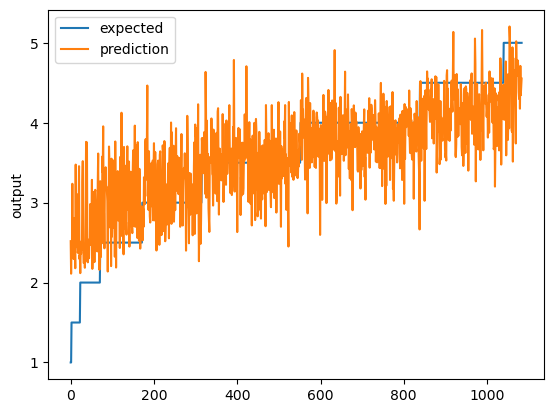

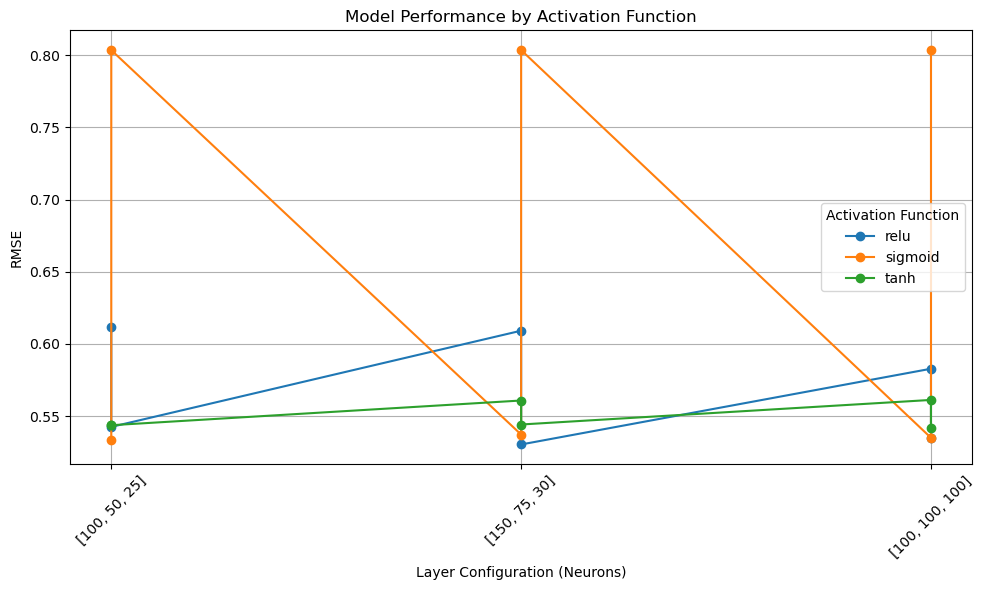

In [3]:
''' 
Tuning the following hyperparameters when training neural networks using Tensorflow and
tabulate all the results of each model on how they affect performance in your report. Also,
save all the models you have tried as a proof in your notebook.
• Activation: relu, sigmoid, tanh
• Number of layers and neuron count for each layer
• Optimizer: adam and sgd. 
'''

from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Set path and preprocess for functions
path = "./yelp_dataset/"

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 20 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 20]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, df_ready_to_be_sent_to_sklearn, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Define hyperparameters that were requested
activations = ['relu', 'sigmoid', 'tanh']
layer_neurons = [[100, 50, 25], [150, 75, 30], [100, 100, 100]]  # Different layer configurations
optimizers = ['adam', 'sgd']

def Model_Test(activation, layer_neurons, optimizer):
    model = Sequential()
    model.add(Dense(layer_neurons[0], input_dim=x_train.shape[1], activation=activation))
    model.add(Dropout(0.1))
    for n in layer_neurons[1:]:
        model.add(Dense(n, activation=activation))
        model.add(Dropout(0.1))
    model.add(Dense(1, activation ='linear'))
    model.compile(loss='mean_squared_error', optimizer = optimizer)
    return model

best_rmse = float('inf')
best_model = None
best_params = {}

results = []

for activation in activations:
    for neurons in layer_neurons:
        for optimizer in optimizers:
            model = Model_Test(activation, neurons, optimizer)

            #
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
            model_filename = f"model_{activation}_{neurons}_{optimizer}.keras"
            checkpointer = ModelCheckpoint(filepath=model_filename, verbose=0, save_best_only=True) # save best model

            # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
            model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

            #
            model.load_weights(model_filename)

            # Predict and measure RMSE
            pred = model.predict(x_test)
            print(pred)
            score = np.sqrt(metrics.mean_squared_error(pred,y_test))
            print("Score (RMSE): {}".format(score))

            # Store results
            results.append({
                'Activation': activation,
                'Neurons': str(neurons),
                'Optimizer': optimizer,
                'RMSE': score
            })

            if score < best_rmse:
                best_rmse = score
                best_model = model
                best_params = {
                    'Activation': activation,
                    'Neurons': neurons,
                    'Optimizer': optimizer,
                    'RMSE': best_rmse
                }

# Table of Results
results_df = pd.DataFrame(results)
print(results_df)

print("\nBest Combination:")
print(best_params)

# Plot the chart
pred = best_model.predict(x_test)
chart_regression(pred.flatten(), y_test)

plot(results_df)

REG
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 - 2s - 42ms/step - loss: 4.5638 - val_loss: 1.3018
Epoch 2/1000
52/52 - 0s - 6ms/step - loss: 0.8399 - val_loss: 0.6359
Epoch 3/1000
52/52 - 0s - 7ms/step - loss: 0.3823 - val_loss: 0.4126
Epoch 4/1000
52/52 - 0s - 7ms/step - loss: 0.2523 - val_loss: 0.3360
Epoch 5/1000
52/52 - 0s - 7ms/step - loss: 0.1803 - val_loss: 0.3222
Epoch 6/1000
52/52 - 0s - 6ms/step - loss: 0.1526 - val_loss: 0.3223
Epoch 7/1000
52/52 - 0s - 6ms/step - loss: 0.1328 - val_loss: 0.3158
Epoch 8/1000
52/52 - 0s - 6ms/step - loss: 0.1149 - val_loss: 0.3207
Epoch 9/1000
52/52 - 0s - 6ms/step - loss: 0.1022 - val_loss: 0.3260
Epoch 10/1000
52/52 - 0s - 7ms/step - loss: 0.0965 - val_loss: 0.3279
Epoch 11/1000
52/52 - 0s - 7ms/step - loss: 0.0954 - val_loss: 0.3299
Epoch 12/1000
52/52 - 0s - 8ms/step - loss: 0.0886 - val_loss: 0.3090
Epoch 13/1000
52/52 - 0s - 6ms/step - loss: 0.0867 - val_loss: 0.3101
Epoch 14/1000
52/52 - 0s - 7ms/step - loss: 0.0842 - val_loss: 0.2991
Epoch 15/1000
52/52 - 0s - 6ms/step - los

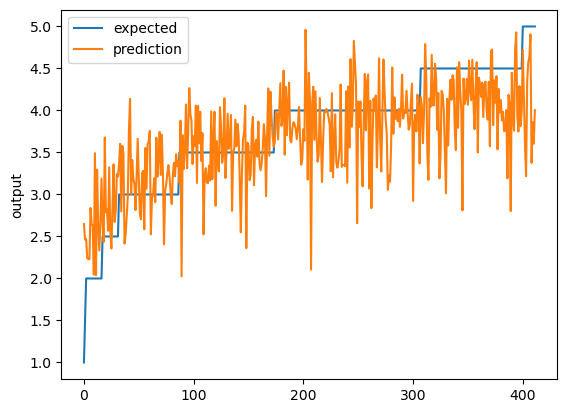

In [7]:
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 70 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 70]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i<10):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
print(pred)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

# Specific data prediction for 10 businesses
for i in range(10):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)


REG
Epoch 1/1000


c:\Users\k47r1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 - 3s - 52ms/step - loss: 5.7439 - val_loss: 1.3287
Epoch 2/1000
49/49 - 0s - 6ms/step - loss: 1.0448 - val_loss: 0.6810
Epoch 3/1000
49/49 - 0s - 6ms/step - loss: 0.5410 - val_loss: 0.3677
Epoch 4/1000
49/49 - 0s - 8ms/step - loss: 0.2908 - val_loss: 0.2890
Epoch 5/1000
49/49 - 0s - 7ms/step - loss: 0.2027 - val_loss: 0.2679
Epoch 6/1000
49/49 - 0s - 6ms/step - loss: 0.1684 - val_loss: 0.2573
Epoch 7/1000
49/49 - 0s - 5ms/step - loss: 0.1452 - val_loss: 0.2789
Epoch 8/1000
49/49 - 0s - 5ms/step - loss: 0.1370 - val_loss: 0.2618
Epoch 9/1000
49/49 - 0s - 7ms/step - loss: 0.1117 - val_loss: 0.2997
Epoch 10/1000
49/49 - 0s - 7ms/step - loss: 0.1107 - val_loss: 0.2590
Epoch 11/1000
49/49 - 0s - 8ms/step - loss: 0.0957 - val_loss: 0.2834
Epoch 12/1000
49/49 - 0s - 9ms/step - loss: 0.0981 - val_loss: 0.2526
Epoch 13/1000
49/49 - 0s - 7ms/step - loss: 0.0853 - val_loss: 0.2706
Epoch 14/1000
49/49 - 0s - 7ms/step - loss: 0.0869 - val_loss: 0.2587
Epoch 15/1000
49/49 - 0s - 6ms/step - los

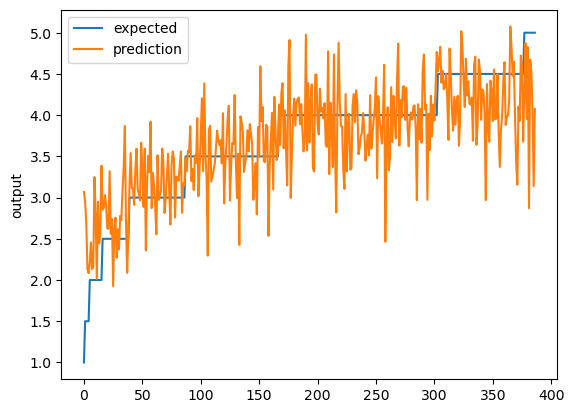

In [8]:
import random
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# Set path and preprocess for functions
path = "./yelp_dataset/"
preprocess = True

#Set paths for JSON
review_Path = os.path.join(path,"yelp_academic_dataset_review.json")
business_Path = os.path.join(path,"yelp_academic_dataset_business.json")

# Read JSON data and drop businesses with less than 75 reviews
review_df = pd.read_json(review_Path, lines=True, nrows = 100000)
all_business_df = pd.read_json(business_Path, lines=True, nrows = 100000)
business_df = all_business_df[all_business_df['review_count'] >= 75]

#You may use the following code to group ALL the reviews by each business and create a new
#dataframe, where each line is a business with all its reviews aggregated together. From there,
#you then use tfidfVectorzier to obtain TFIDF representation for each business.
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_ready_to_be_sent_to_sklearn = pd.DataFrame({'business_id': df_review_agg.index,
                                               'all_reviews': df_review_agg.values,})

#Create table with ID, stars, and all reviews in one table then change 'stars' since this is already a col on tfidf
business_subset = business_df[['business_id', 'stars']]
business_names = business_df[['name', 'business_id']]
review_subset = df_ready_to_be_sent_to_sklearn[['business_id', 'all_reviews']]
merged_df = pd.merge(business_subset, review_subset, on='business_id', how='inner')
merged_df.rename(columns={'stars': 'stars_for_model'}, inplace=True)

# Initialize the tfidf Vectorizer and set max features and stop words
tfidf = TfidfVectorizer(max_features=4000,stop_words="english")

# Transform all_reviews and turn into a matrix
tfidf_matrix = tfidf.fit_transform(merged_df['all_reviews'])

# Turn the matrix into a dataframe where the cols are all the words. Then add the stars into the dataframe for model to use and use to_xy for tensorflow to read
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df = pd.concat([merged_df['stars_for_model'], tfidf_df] , axis=1)
x,y = to_xy(tfidf_df,'stars_for_model')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#Run the model 5 times to ensure best model is found
i = 0
while (i<5):
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dropout(0.1))
    model.add(Dense(25, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.001, beta_1=0.999, beta_2=0.999, epsilon=None, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="dnn/yelp.keras", verbose=0, save_best_only=True) # save best model

    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size= 32, callbacks=[monitor,checkpointer], verbose=2, epochs=1000)
    i = i+1

model.load_weights('dnn/yelp.keras') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
print(pred)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Merged df to connect business names back to the star ratings
merged_name_star = pd.merge(business_names, merged_df, on='business_id', how='inner')
businesses = merged_name_star['name']
b_id = merged_name_star['business_id']

for i in range(10):
    j = random.randint(0, (pred.size) - 1)
    print("{}. {} {}: rating: {}, predicted rating: {}".format(j+1, businesses[j], b_id[j], y[j], pred[j]))

# Plot the chart
chart_regression(pred.flatten(),y_test)
